In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
pd.set_option('display.max_rows',25)
pd.set_option('display.max_colwidth', 500)

In [3]:
with open('../data/data_final_dtypes.json', 'r') as f:
    dtypes = json.load(f)

In [4]:
df = pd.read_csv('../data/data_final.csv', dtype=dtypes)

In [5]:
df.date = pd.to_datetime(df.date)

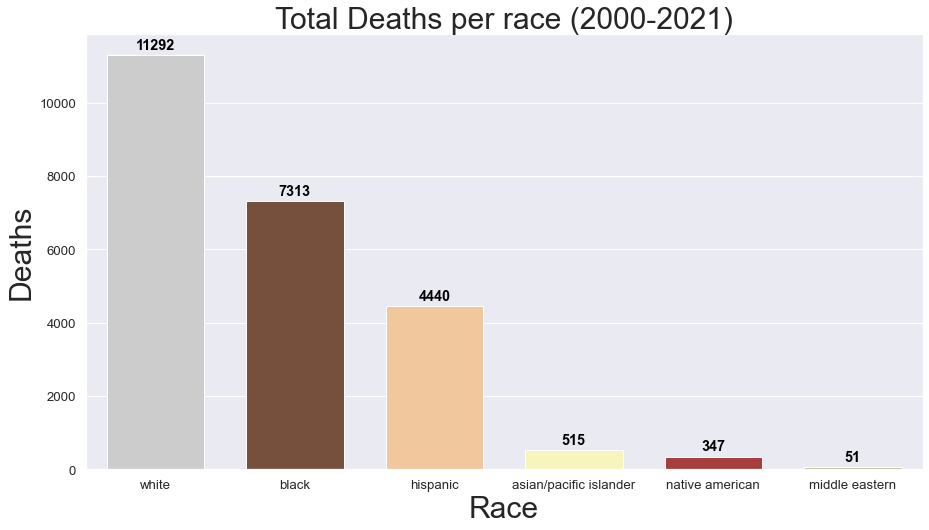

In [19]:
# total deaths per race 2000-2021
plt.rcParams['figure.figsize'] = 15,8
sns.set(font_scale = 1.2)
fig = sns.countplot(data=df, x='race', 
                    order = df['race'].value_counts().index, 
                    palette=[(0.8,0.8,0.8),(0.5,0.3,0.2),(1,0.78,0.56),(1,1,0.7),(0.73,0.17,0.17),(0.77,0.77,0.6)])

values = df['race'].value_counts().values
values = [x for x in values.tolist()]
pos = range(len(values))

for tick,label in zip(pos,fig.get_xticklabels()):
    fig.text(pos[tick], values[tick]+170, values[tick], horizontalalignment='center', size='medium', color=(0,0,0), weight='semibold')
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(fig, .7)

plt.xlabel('Race', size=30)
plt.ylabel('Deaths', size=30)
plt.title('Total Deaths per race (2000-2021)', size=30)
plt.show()

In [7]:
# Race population percentages in US: https://en.wikipedia.org/wiki/Demographics_of_the_United_States#Race
race_perc = {
'white':0.615,
'black':0.123,
'hispanic':0.176,
'asian':0.053,
'native american':0.007,
'middle eastern':0.003,}

In [33]:
race_counts = df.race.value_counts()
race_counts = pd.DataFrame(race_counts)
race_counts.rename(index={'asian/pacific islander': 'asian'}, inplace=True)
race_counts['pop_perc']=race_counts.index.map(race_perc)

In [34]:
# Average per million of population killed every year by police per race (average total population 310m 2000-2020)
race_counts['death_perc']=race_counts.race*1000000/(310000000*race_counts.pop_perc*20)

In [35]:
race_counts

,race,pop_perc,death_perc
white,11292,0.615,2.961448
black,7313,0.123,9.589562
hispanic,4440,0.176,4.068915
asian,515,0.053,1.567255
native american,347,0.007,7.995392
middle eastern,51,0.003,2.741935


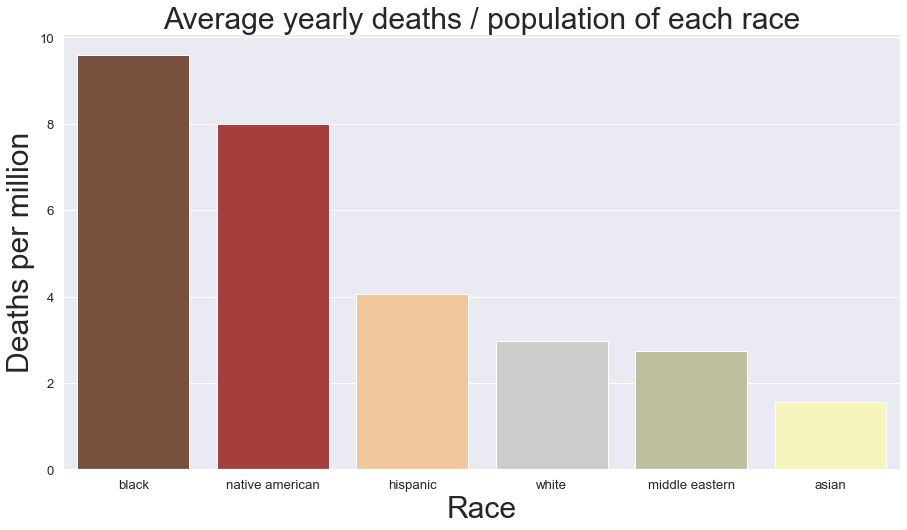

In [36]:
# refine pending (sort large to small, colors)
plt.rcParams['figure.figsize'] = 15,8
sns.set(font_scale = 1.2)

fig = sns.barplot(data=race_counts, x=race_counts.index, y='death_perc',
                  order = race_counts['death_perc'].sort_values(ascending=False).index, 
                  palette=[(0.5,0.3,0.2),(0.73,0.17,0.17),(1,0.78,0.56),(0.8,0.8,0.8),(0.77,0.77,0.6),(1,1,0.7)])

plt.xlabel('Race', size=30)
plt.ylabel('Deaths per million', size=30)
plt.title('Average yearly deaths / population of each race', size=30)
plt.show()

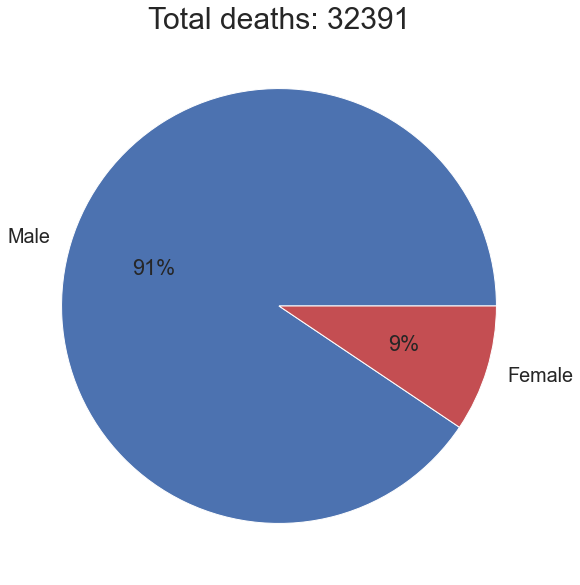

In [28]:
# Gender
data = [29318, 3048]
labels = ['Male', 'Female']
plt.rcParams['figure.figsize'] = 10,10
sns.set(font_scale = 1.8)
plt.pie(data, labels = labels, colors =['b','r'] , autopct='%.0f%%')
plt.title('Total deaths: 32391', size=30)
plt.show()

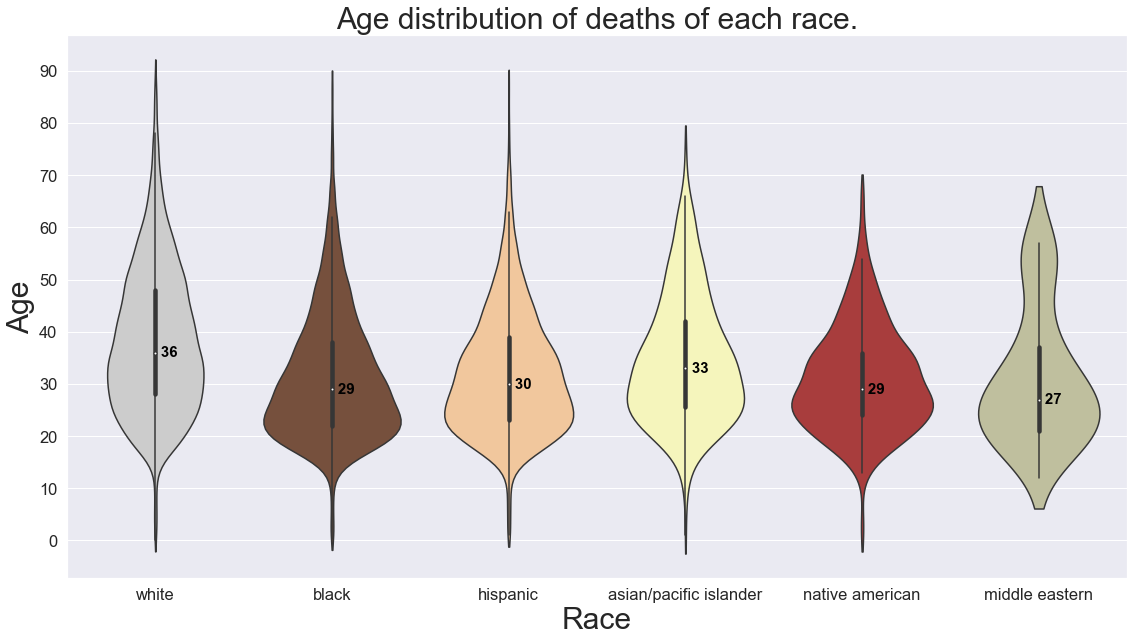

In [211]:
# Age distribution of deaths of each race.
age_race = df.pivot_table(index = df.index, columns=['race'], values='age')
age_race = age_race[age_race<=90]
age_race = age_race[['white','black','hispanic','asian/pacific islander','native american','middle eastern']]
plt.rcParams['figure.figsize'] = 19,10
plt.title('Age distribution of deaths of each race.', size=30)
sns.set(font_scale = 1.5)
fig = sns.violinplot(data=age_race,cut=1, palette=[(0.8,0.8,0.8),(0.5,0.3,0.2),(1,0.78,0.56),(1,1,0.7),(0.73,0.17,0.17),(0.77,0.77,0.6)])
plt.xlabel('Race', size=30)
plt.ylabel('Age', size=30)
fig.set(yticks=range(0,95,10))

# Calculate median to position labels
medians = age_race.median().values
nobs = medians
nobs = [str(int(x)) for x in nobs.tolist()]
nobs = ["       " + i for i in nobs] 

# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, fig.get_xticklabels()):
    fig.text(pos[tick], medians[tick]-0.8, nobs[tick],
            horizontalalignment='center',
            size=15,
            color=(0,0,0),
            weight='semibold')
plt.show()

In [44]:
# refine pending
yearly_deaths = pd.DatetimeIndex(df.date).year
yearly_deaths = yearly_deaths.drop(2021).value_counts().sort_index(ascending=True)
yearly_deaths = pd.DataFrame(yearly_deaths)

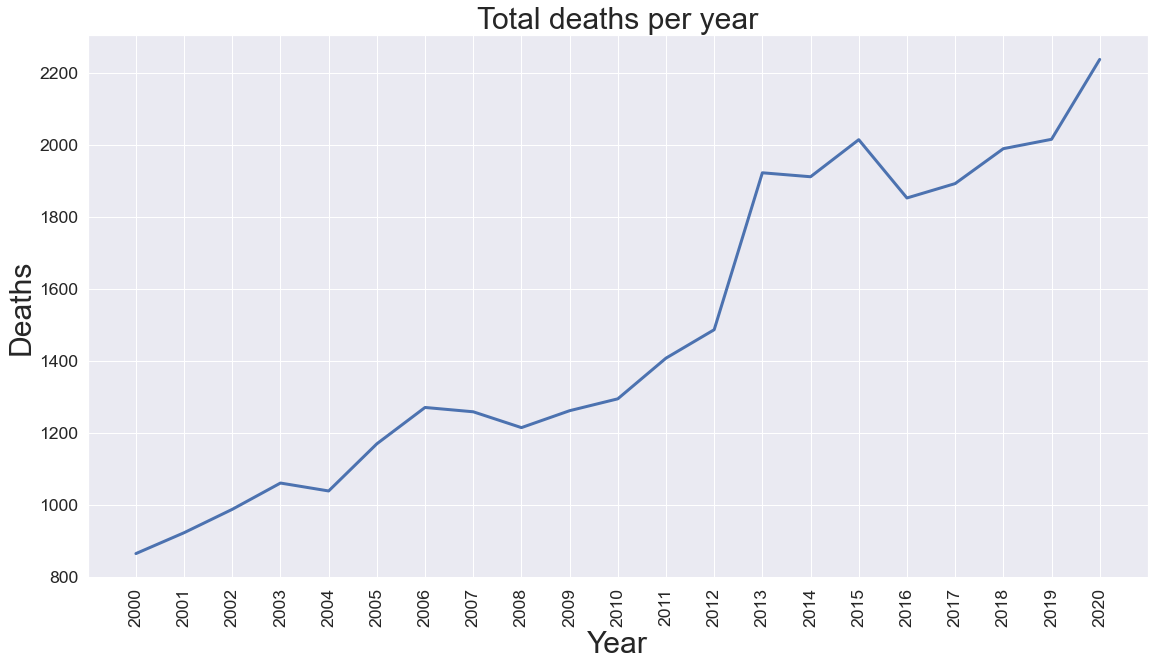

In [55]:
plt.rcParams['figure.figsize'] = 19,10
sns.set(font_scale = 1.6)

fig = sns.lineplot(data=yearly_deaths, x=yearly_deaths.index, y='date',linewidth = 3)
fig.set(xticks=range(2000,2021,1))
plt.xlabel('Year', size=30)
plt.xticks(rotation=90)
plt.ylabel('Deaths', size=30)
plt.title('Total deaths per year', size=30)
plt.show()

In [65]:
df.city.value_counts().head(50).index.map(print)

Houston
Chicago
Los Angeles
Phoenix
San Antonio
Kansas City
Philadelphia
Las Vegas
St. Louis
Dallas
Detroit
Oklahoma City
Columbus
Albuquerque
Jacksonville
Atlanta
Baltimore
Miami
Fresno
Tucson
San Diego
Denver
Cleveland
Brooklyn
Bakersfield
Tulsa
Indianapolis
Milwaukee
Oakland
Memphis
Orlando
Austin
Richmond
Washington
San Francisco
Fort Worth
Louisville
Seattle
Long Beach
Springfield
Newark
San Jose
Jackson
San Bernardino
Omaha
Sacramento
Portland
Stockton
Greenville
Mesa


Index([None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None],
      dtype='object')

In [59]:
df.columns

Index(['name', 'date', 'state', 'age', 'age_groups', 'gender', 'race',
       'address', 'city', 'latitude', 'longitude', 'zipcode', 'county',
       'agency', 'death_cause', 'weapon', 'threat', 'fleeing',
       'intended_force', 'encounter_type', 'disposition', 'mental_symptoms',
       'description_x', 'description_y', '_merge'],
      dtype='object')

In [19]:
# crime rate vs death rate
